In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [58]:
data=pd.read_csv(r'C:\Users\bathma\Desktop\pca datasqeeze stock.csv')

In [63]:
data.head()

,Open,High,Low,Close,Volume,Symbol
0,3.37,3.3700,3.3700,3.3700,175.0,PPSI
1,3.36,3.3600,3.3300,3.3300,1889.0,PPSI
2,3.33,3.3932,3.3296,3.3932,2630.0,PPSI
3,3.33,3.3300,3.3200,3.3200,1350.0,PPSI
4,3.33,3.3300,3.3300,3.3300,173.0,PPSI


In [65]:
feature=['Open','Volume','Low','Close','Volume']


In [67]:
X=data.loc[:,feature]
y=data.loc[:,'Symbol']

In [68]:
X=StandardScaler().fit_transform(X)


In [69]:
#Converting PCA excecution and projection to 2D
from sklearn.decomposition import PCA


In [70]:
pca=PCA(n_components=2)
pct=pca.fit_transform(X)
principal_data=pd.DataFrame(pct,columns=['PC1','PC2'])
final_data=pd.concat([principal_data,data[['Symbol']]],axis=1)


In [72]:
final_data.head()

,PC1,PC2,Symbol
0,0.634323,-0.566112,PPSI
1,0.635716,-0.563394,PPSI
2,0.635738,-0.562086,PPSI
3,0.635912,-0.564395,PPSI
4,0.635294,-0.566339,PPSI


array([0.61117786, 0.38881402])

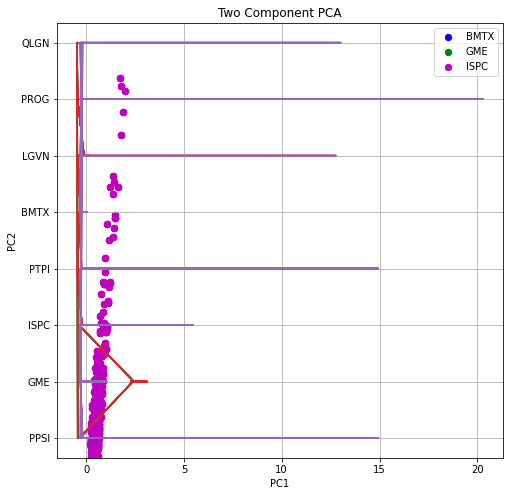

In [73]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Two Component PCA')
targets=['BMTX','GME','ISPC','LGVN','PPSI','PROG','PTPI','QLGN']
colors=['b','g','m']
for target,color in zip(targets,colors):
    index=final_data['Symbol']==target
    ax.scatter(final_data.loc[index,'PC1'],final_data.loc[index,'PC2'],c=color,s=40)
    ax.legend(targets)
    ax.grid()
plt.plot(X,y)
pca.explained_variance_ratio_

In [74]:
final_data

,PC1,PC2,Symbol
0,0.634323,-0.566112,PPSI
1,0.635716,-0.563394,PPSI
2,0.635738,-0.562086,PPSI
3,0.635912,-0.564395,PPSI
4,0.635294,-0.566339,PPSI
...,...,...,...
50224,0.681037,-0.563683,QLGN
50225,0.709795,-0.441689,QLGN
50226,0.679600,-0.571409,QLGN
50227,0.681408,-0.563931,QLGN
